# 0. 기본 정보
* 코드 작성자: 여서연
* 코드 작성일: 2024-06-01

# 1. 기초 설정

## 사용 라이브러리

In [269]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 기타 설정

In [270]:
# 데이터 프레임 열 전부 표시
pd.set_option('display.max_columns', None)

# 2. 전처리 및 EDA

## A. 데이터 확인

In [271]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [272]:
train.head()

,시군구,면적총계(m2),농약사용면적(m2),농약미사용면적(m2),총사용량_실물량(kg),총사용량_성분량(kg),농약사용_ha_성분량(kg),농약사용_ha_실물량(kg),전체면적대비_ha_성분량(kg),전체면적대비_ha_실물량(kg),연평균_강수량,측정값(총대장균군)
0,강릉시,582247.333333,335607.333333,246640.0,675.0685,233.595067,6.995625,21.057476,4.027363,11.899533,133.283333,8831.898734
1,고성군,921266.500000,513368.500000,407898.0,1489.3125,563.575175,7.799428,21.060081,4.129354,11.371300,148.083333,9176.044776
2,동해시,238565.000000,206953.000000,31612.0,226.6400,33.750000,1.630805,10.951279,1.414709,9.500136,119.708333,719.250000
3,삼척시,974748.500000,460192.500000,514556.0,1157.2950,256.518300,5.677880,24.945085,2.636115,11.860218,132.000000,3374.892857
4,속초시,455394.500000,224794.500000,230600.0,411.2500,127.052450,5.296649,16.721147,2.777307,8.460465,148.083333,2567.625000


In [273]:
test.head()

,시군구,면적총계(m2),농약사용면적(m2),농약미사용면적(m2),총사용량_실물량(kg),총사용량_성분량(kg),농약사용_ha_성분량(kg),농약사용_ha_실물량(kg),전체면적대비_ha_성분량(kg),전체면적대비_ha_실물량(kg),연평균_강수량,측정값(총대장균군)
0,강릉시,5.885358e+05,336963.000000,251572.79,1394.0600,385.532613,11.625277,43.827415,6.330546,23.250838,151.075000,3447.710843
1,고성군,1.228355e+06,684491.333333,543864.00,2394.0800,859.571027,12.092960,33.961476,6.750470,19.088488,173.816667,2983.030303
2,동해시,2.385650e+05,206953.000000,31612.00,1080.3320,267.240776,12.913114,52.201804,11.202011,45.284597,110.200000,1904.028571
3,삼척시,9.747485e+05,460192.500000,514556.00,992.4725,300.522001,6.631652,21.656875,3.087333,10.183989,128.825000,1078.357143
4,속초시,4.553945e+05,224794.500000,230600.00,534.6900,139.085350,5.735455,21.184061,2.961786,10.304701,173.816667,381.916667


In [274]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   시군구                30 non-null     object 
 1   면적총계(m2)           30 non-null     float64
 2   농약사용면적(m2)         30 non-null     float64
 3   농약미사용면적(m2)        30 non-null     float64
 4   총사용량_실물량(kg)       30 non-null     float64
 5   총사용량_성분량(kg)       30 non-null     float64
 6   농약사용_ha_성분량(kg)    30 non-null     float64
 7   농약사용_ha_실물량(kg)    30 non-null     float64
 8   전체면적대비_ha_성분량(kg)  30 non-null     float64
 9   전체면적대비_ha_실물량(kg)  30 non-null     float64
 10  연평균_강수량            30 non-null     float64
 11  측정값(총대장균군)         30 non-null     float64
dtypes: float64(11), object(1)
memory usage: 2.9+ KB


In [275]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   시군구                15 non-null     object 
 1   면적총계(m2)           15 non-null     float64
 2   농약사용면적(m2)         15 non-null     float64
 3   농약미사용면적(m2)        15 non-null     float64
 4   총사용량_실물량(kg)       15 non-null     float64
 5   총사용량_성분량(kg)       15 non-null     float64
 6   농약사용_ha_성분량(kg)    15 non-null     float64
 7   농약사용_ha_실물량(kg)    15 non-null     float64
 8   전체면적대비_ha_성분량(kg)  15 non-null     float64
 9   전체면적대비_ha_실물량(kg)  15 non-null     float64
 10  연평균_강수량            15 non-null     float64
 11  측정값(총대장균군)         15 non-null     float64
dtypes: float64(11), object(1)
memory usage: 1.5+ KB


## B. 결측치 - 값이 0인 데이터

In [276]:
for index, row in train.iterrows():
    if (row == 0).any():
        print(f"Index: {index}")
        print(row)

Index: 11
시군구                          태백시
면적총계(m2)                751394.5
농약사용면적(m2)              670776.5
농약미사용면적(m2)              80618.0
총사용량_실물량(kg)                 0.0
총사용량_성분량(kg)                 0.0
농약사용_ha_성분량(kg)              0.0
농약사용_ha_실물량(kg)              0.0
전체면적대비_ha_성분량(kg)            0.0
전체면적대비_ha_실물량(kg)            0.0
연평균_강수량               124.108333
측정값(총대장균군)           8604.304348
Name: 11, dtype: object


In [277]:
for index, row in test.iterrows():
    if (row == 0).any():
        print(f"Index: {index}")
        print(row)

In [278]:
train = train[train['시군구']!='태백시']
test = test[test['시군구']!='태백시']

In [279]:
# 시군구 컬럼 제거 (모델 학습에 필요없음)
train = train.drop(columns=['시군구'])
test = test.drop(columns=['시군구'])

## C. 이상치

In [280]:
def GetOutlier(df, col, weight=1.5):
    outlier_list = []
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    for i in df[col]:
        if i > Q3 + weight*IQR :
            outlier_list.append(i)
        if i < Q1 - weight*IQR :
            outlier_list.append(i)

    cnt_outlier = len(outlier_list)
    uniq_outlier = list(set(outlier_list)) #고유값만 출력

    if len(outlier_list) == 0:
        print(col, '이상치 없음')

    else:
        print(col, '이상치:', np.sort(uniq_outlier))

In [281]:
# list 형식
for col in train.columns:
    GetOutlier(train, col)
print()
for col in test.columns:
    GetOutlier(test, col)

면적총계(m2) 이상치 없음
농약사용면적(m2) 이상치 없음
농약미사용면적(m2) 이상치 없음
총사용량_실물량(kg) 이상치: [2331.0225]
총사용량_성분량(kg) 이상치 없음
농약사용_ha_성분량(kg) 이상치 없음
농약사용_ha_실물량(kg) 이상치: [37.83125 59.     ]
전체면적대비_ha_성분량(kg) 이상치: [9.89]
전체면적대비_ha_실물량(kg) 이상치: [51.6]
연평균_강수량 이상치 없음
측정값(총대장균군) 이상치: [28538.48333333]

면적총계(m2) 이상치 없음
농약사용면적(m2) 이상치 없음
농약미사용면적(m2) 이상치 없음
총사용량_실물량(kg) 이상치 없음
총사용량_성분량(kg) 이상치: [859.57102667]
농약사용_ha_성분량(kg) 이상치 없음
농약사용_ha_실물량(kg) 이상치 없음
전체면적대비_ha_성분량(kg) 이상치: [11.20201102]
전체면적대비_ha_실물량(kg) 이상치: [45.28459749]
연평균_강수량 이상치 없음
측정값(총대장균군) 이상치: [14761.69327731]


In [282]:
# subplot 행렬 차원 계산
target_cols = train.columns #train과 test 컬럼 수는 동일
box_lists = len(target_cols)
box_rows = int(box_lists ** 0.5)  #제곱근을 정수로 변환하여 가장 가까운 값으로 설정
box_cols = (box_lists + box_rows - 1) // box_rows  #가장 가까운 값을 사용하여 열 개수 계산

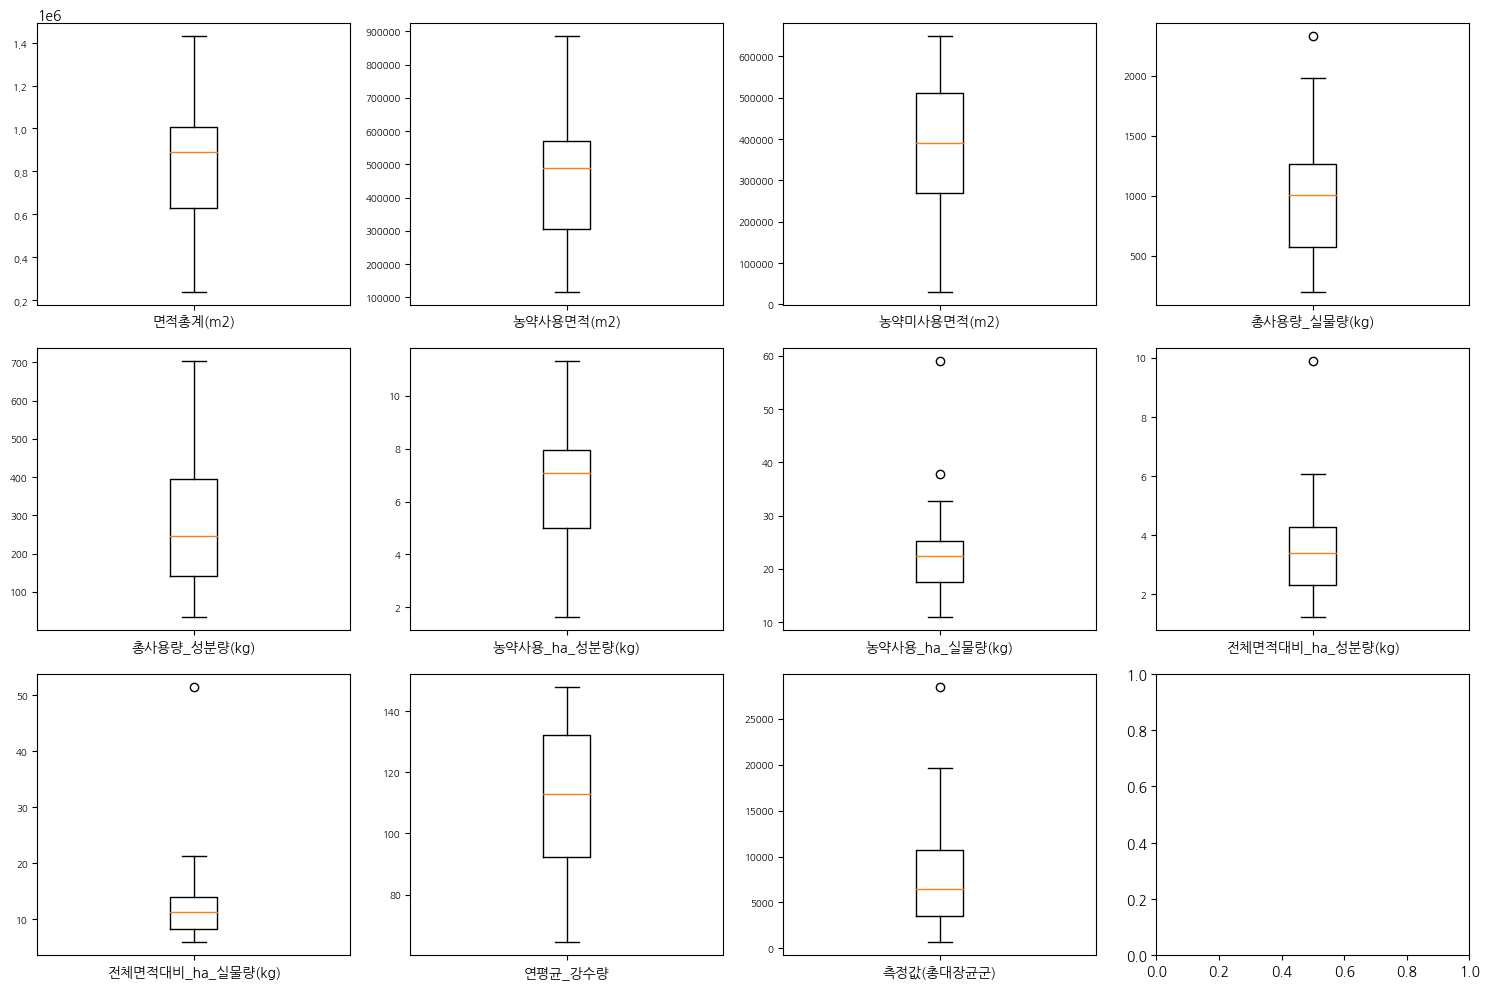

In [283]:
# Boxplot 형식
fig, axes = plt.subplots(box_rows, box_cols, figsize=(15, 10))

for i, col in enumerate(target_cols):
    row_idx = i // box_cols
    col_idx = i % box_cols

    ax = axes[row_idx, col_idx] if box_rows > 1 else axes[col_idx]
    ax.boxplot(train[col])
    ax.set_xticklabels([col], fontsize=10)
    ax.set_xlabel('')
    ax.tick_params(axis='y', labelsize=7)

plt.tight_layout()
plt.show()

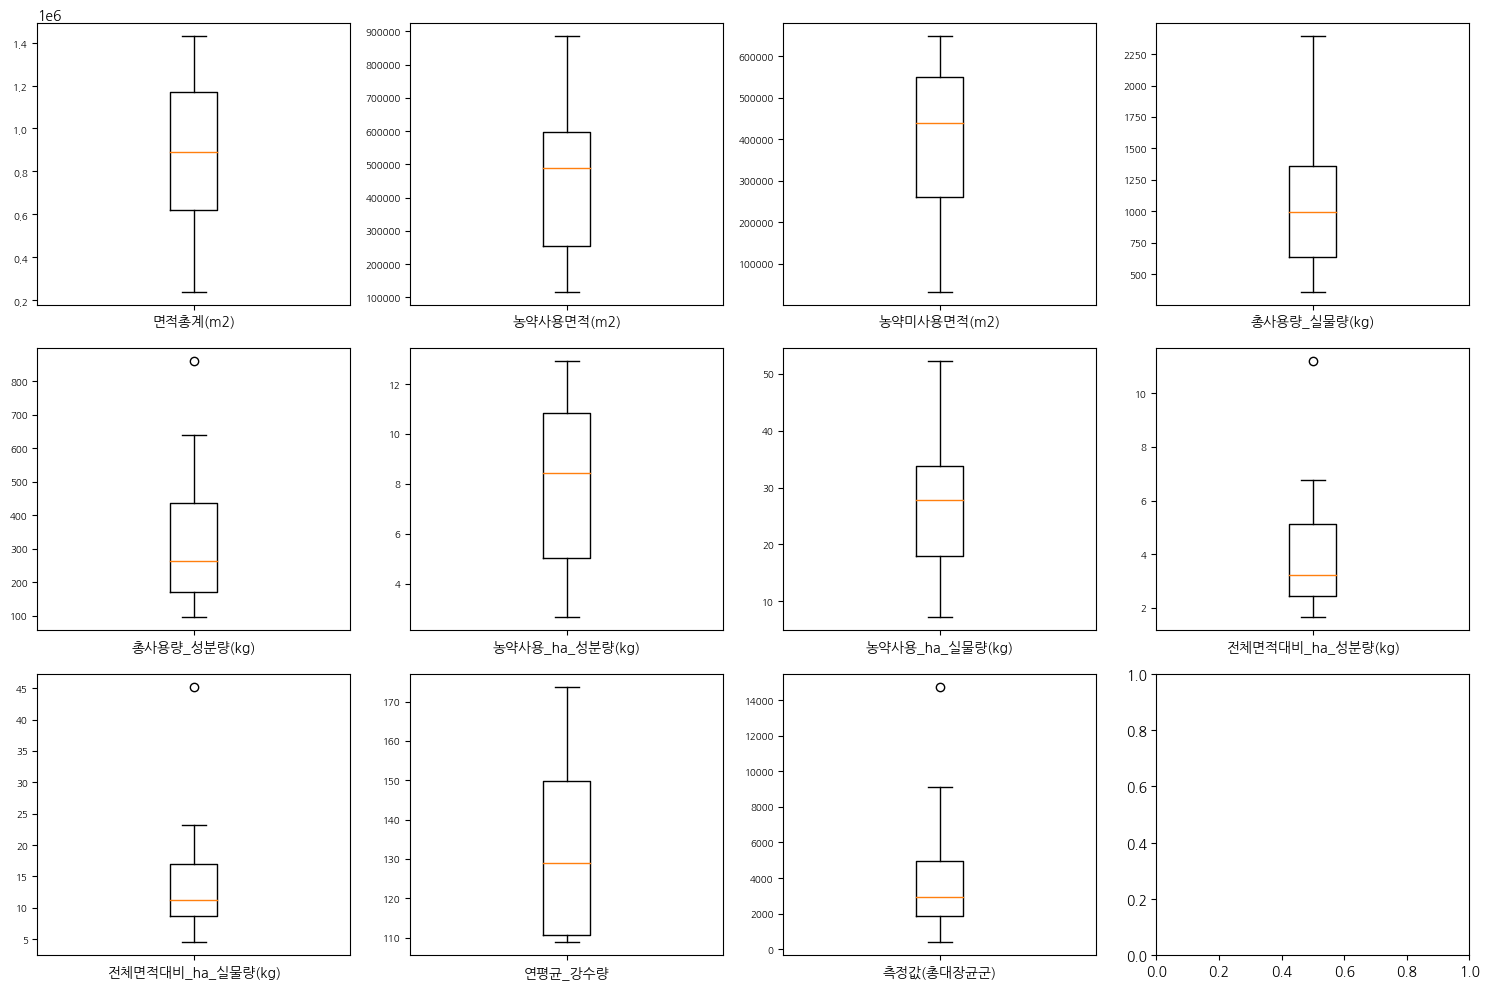

In [284]:
# Boxplot 형식
fig, axes = plt.subplots(box_rows, box_cols, figsize=(15, 10))

for i, col in enumerate(target_cols):
    row_idx = i // box_cols
    col_idx = i % box_cols

    ax = axes[row_idx, col_idx] if box_rows > 1 else axes[col_idx]
    ax.boxplot(test[col])
    ax.set_xticklabels([col], fontsize=10)
    ax.set_xlabel('')
    ax.tick_params(axis='y', labelsize=7)

plt.tight_layout()
plt.show()

## D. 정규성 확인

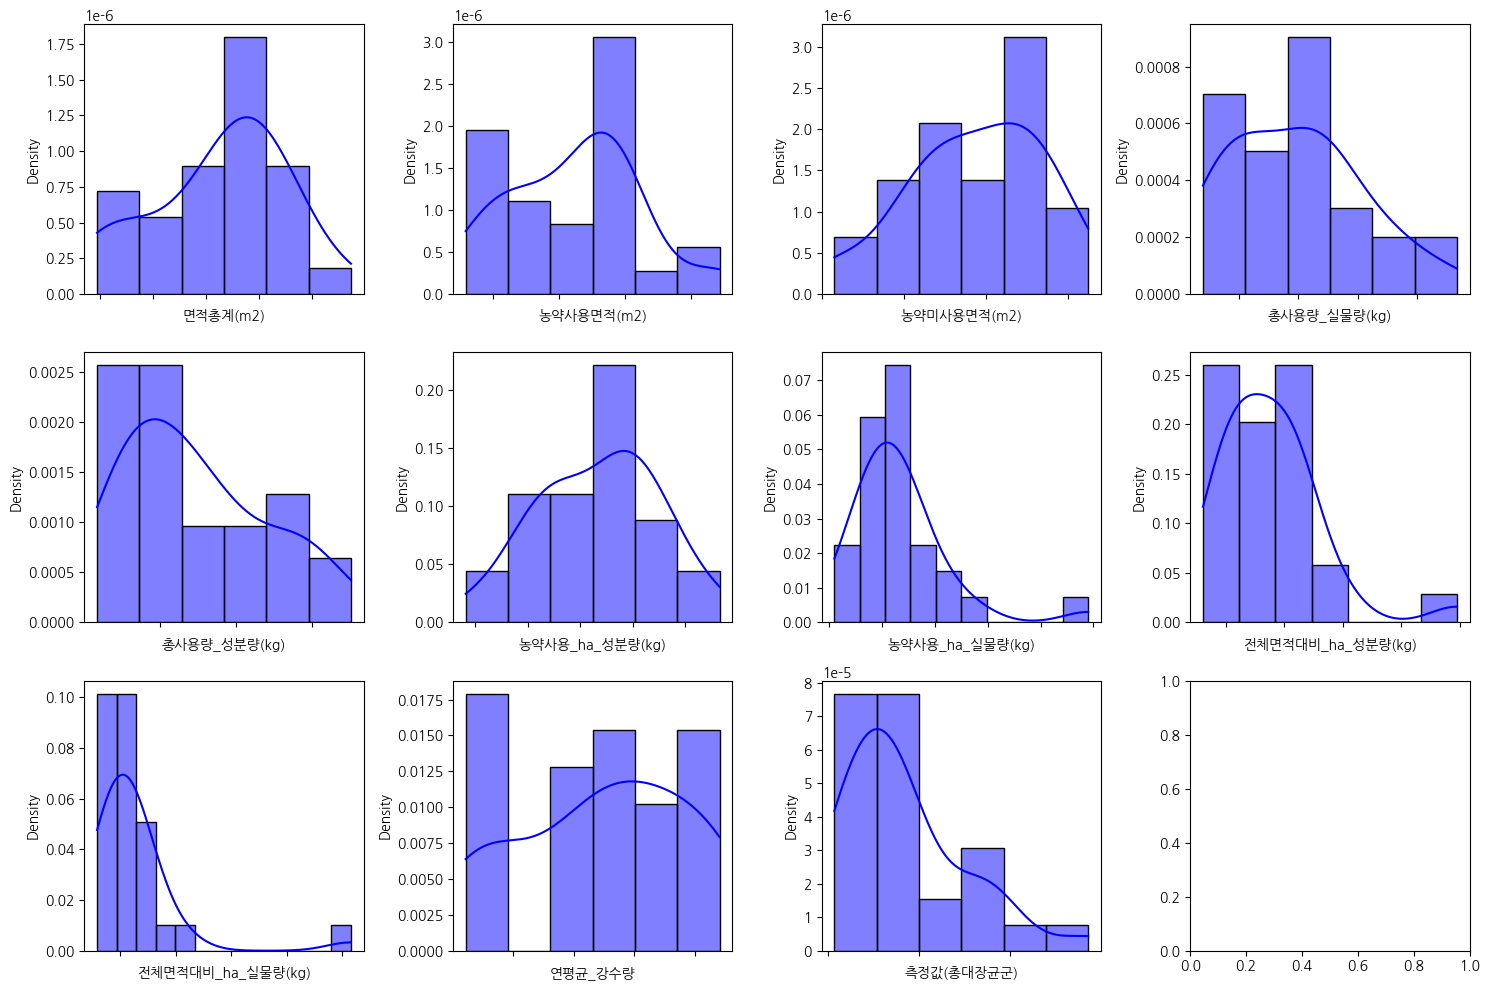

In [285]:
fig, axes = plt.subplots(box_rows, box_cols, figsize=(15, 10))

for i, col in enumerate(target_cols):
    row_idx = i // box_cols
    col_idx = i % box_cols

    ax = axes[row_idx, col_idx] if box_rows > 1 else axes[col_idx]
    sns.histplot(train[col], color='blue', kde=True, ax=ax, label='Negative', stat='density', alpha=0.5)
    ax.set_xticklabels('')
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

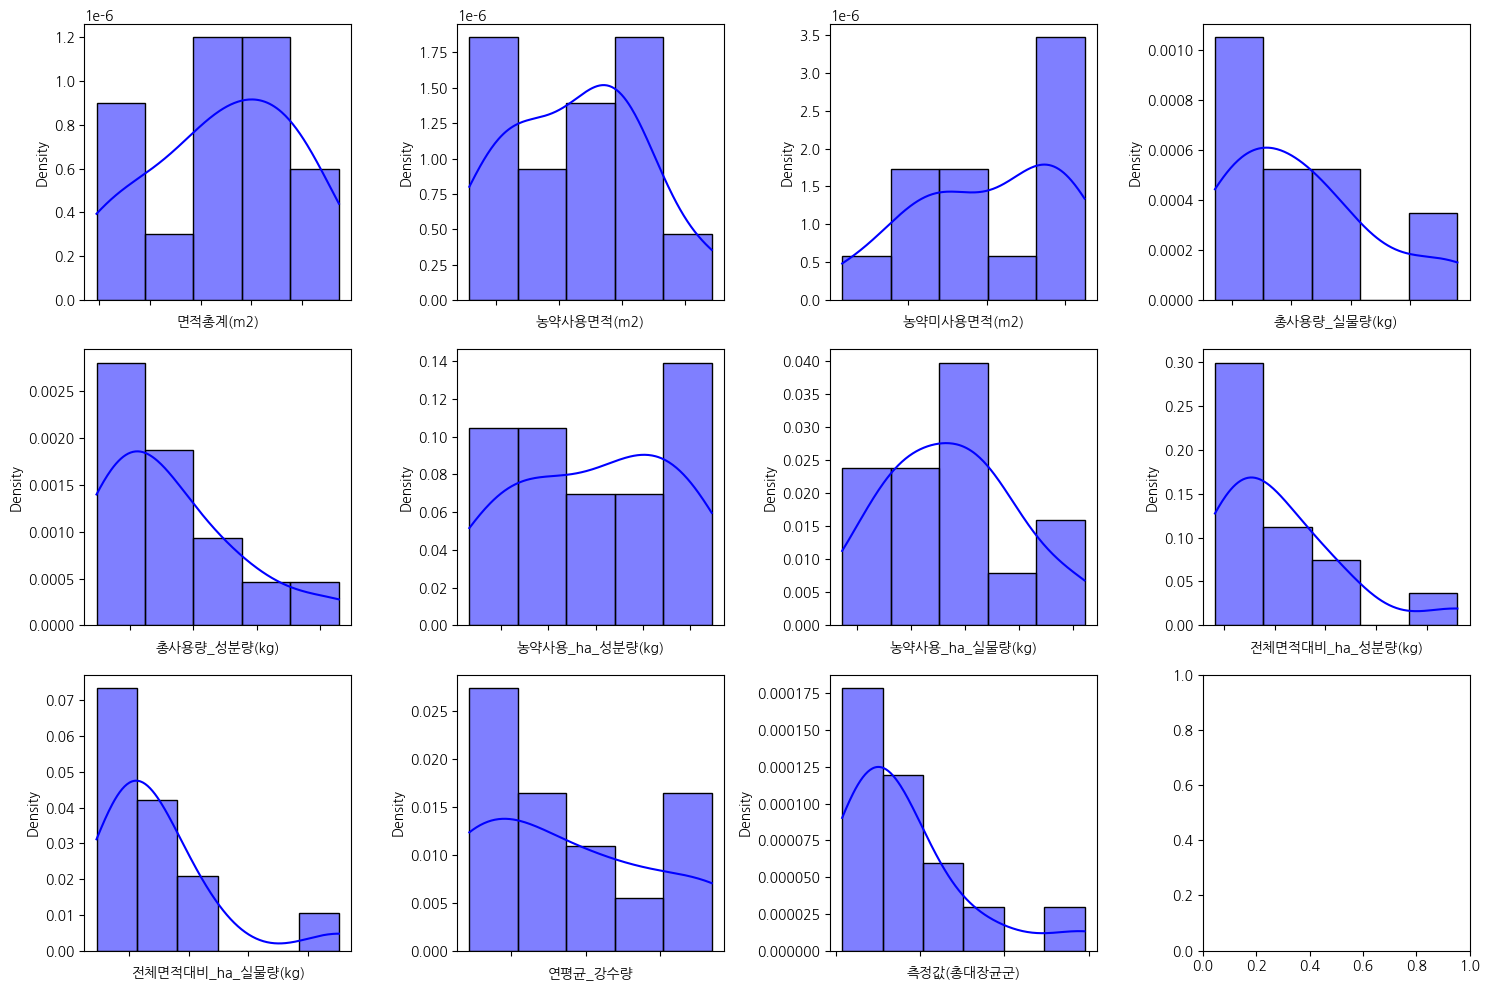

In [286]:
fig, axes = plt.subplots(box_rows, box_cols, figsize=(15, 10))

for i, col in enumerate(target_cols):
    row_idx = i // box_cols
    col_idx = i % box_cols

    ax = axes[row_idx, col_idx] if box_rows > 1 else axes[col_idx]
    sns.histplot(test[col], color='blue', kde=True, ax=ax, label='Negative', stat='density', alpha=0.5)
    ax.set_xticklabels('')
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

In [287]:
train_non_norm = []
for column in train.columns:
    print(f"변수 '{column}'의 정규성 검정 결과:")

    # 샤피로-윌크 검정
    shapiro_stat, shapiro_p = stats.shapiro(train[column])
    print(f"샤피로윌크스 검정 - 통계량(statistic): {shapiro_stat:.4f}, p-value={shapiro_p:.4f}")
    print()
    # 정규성을 만족하지 않는 컬럼 저장
    if shapiro_p < 0.05:
        train_non_norm.append(column)

변수 '면적총계(m2)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9502, p-value=0.2002

변수 '농약사용면적(m2)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9481, p-value=0.1778

변수 '농약미사용면적(m2)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9669, p-value=0.4995

변수 '총사용량_실물량(kg)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9548, p-value=0.2612

변수 '총사용량_성분량(kg)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9314, p-value=0.0670

변수 '농약사용_ha_성분량(kg)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9812, p-value=0.8784

변수 '농약사용_ha_실물량(kg)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.8063, p-value=0.0001

변수 '전체면적대비_ha_성분량(kg)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.8614, p-value=0.0016

변수 '전체면적대비_ha_실물량(kg)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.5720, p-value=0.0000

변수 '연평균_강수량'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9251, p-value=0.0465

변수 '측정값(총대장균군)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.8794, p-value=0.0039



In [288]:
test_non_norm = []
for column in test.columns:
    print(f"변수 '{column}'의 정규성 검정 결과:")

    # 샤피로-윌크 검정
    shapiro_stat, shapiro_p = stats.shapiro(test[column])
    print(f"샤피로윌크스 검정 - 통계량(statistic): {shapiro_stat:.4f}, p-value={shapiro_p:.4f}")
    print()
    # 정규성을 만족하지 않는 컬럼 저장
    if shapiro_p < 0.05:
        test_non_norm.append(column)

변수 '면적총계(m2)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9564, p-value=0.6636

변수 '농약사용면적(m2)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9567, p-value=0.6679

변수 '농약미사용면적(m2)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9187, p-value=0.2103

변수 '총사용량_실물량(kg)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.8996, p-value=0.1115

변수 '총사용량_성분량(kg)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.8893, p-value=0.0791

변수 '농약사용_ha_성분량(kg)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9452, p-value=0.4892

변수 '농약사용_ha_실물량(kg)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9821, p-value=0.9851

변수 '전체면적대비_ha_성분량(kg)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.8379, p-value=0.0153

변수 '전체면적대비_ha_실물량(kg)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.7534, p-value=0.0014

변수 '연평균_강수량'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.8557, p-value=0.0266

변수 '측정값(총대장균군)'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.7801, p-value=0.0029



In [289]:
print(train_non_norm)
print(test_non_norm)

['농약사용_ha_실물량(kg)', '전체면적대비_ha_성분량(kg)', '전체면적대비_ha_실물량(kg)', '연평균_강수량', '측정값(총대장균군)']
['전체면적대비_ha_성분량(kg)', '전체면적대비_ha_실물량(kg)', '연평균_강수량', '측정값(총대장균군)']


In [290]:
# 변환 방법 리스트
transformations = {
    'log': np.log1p,
    'sqrt': np.sqrt,
    'boxcox': lambda x: stats.boxcox(x + 1)[0]  # boxcox 변환은 0 이상의 값이어야 하므로 1을 더해줌
}

In [291]:
def Regulation(df, cols):
    best_transformation = {}

    for column in cols:
        print(f"컬럼 '{column}'의 변환 및 정규성 검정 결과:")
        original_data = df[column].values

        best_p_value = 0
        best_method = None

        # 원본 데이터 정규성 검정
        _, original_p_value = stats.shapiro(original_data)
        print(f"원본 데이터: p-value={original_p_value:.4f}")
        if original_p_value > best_p_value:
            best_p_value = original_p_value
            best_method = 'original'

        for method, transform in transformations.items():
            try:
                transformed_data = transform(original_data)
                _, p_value = stats.shapiro(transformed_data)
                print(f"{method} 변환: p-value={p_value:.4f}")
                if p_value > best_p_value:
                    best_p_value = p_value
                    best_method = method
            except ValueError as e:
                print(f"{method} 변환 실패: {e}")

        best_transformation[column] = best_method
        print(f"가장 적절한 변환 방법: {best_method}\n")

    print("각 컬럼의 최적 변환 방법:", best_transformation)

In [292]:
Regulation(train, train_non_norm)

컬럼 '농약사용_ha_실물량(kg)'의 변환 및 정규성 검정 결과:
원본 데이터: p-value=0.0001
log 변환: p-value=0.3444
sqrt 변환: p-value=0.0125
boxcox 변환: p-value=0.9135
가장 적절한 변환 방법: boxcox

컬럼 '전체면적대비_ha_성분량(kg)'의 변환 및 정규성 검정 결과:
원본 데이터: p-value=0.0016
log 변환: p-value=0.6978
sqrt 변환: p-value=0.1843
boxcox 변환: p-value=0.8939
가장 적절한 변환 방법: boxcox

컬럼 '전체면적대비_ha_실물량(kg)'의 변환 및 정규성 검정 결과:
원본 데이터: p-value=0.0000
log 변환: p-value=0.0030
sqrt 변환: p-value=0.0000
boxcox 변환: p-value=0.8928
가장 적절한 변환 방법: boxcox

컬럼 '연평균_강수량'의 변환 및 정규성 검정 결과:
원본 데이터: p-value=0.0465
log 변환: p-value=0.0118
sqrt 변환: p-value=0.0263
boxcox 변환: p-value=0.0566
가장 적절한 변환 방법: boxcox

컬럼 '측정값(총대장균군)'의 변환 및 정규성 검정 결과:
원본 데이터: p-value=0.0039
log 변환: p-value=0.2403
sqrt 변환: p-value=0.5783
boxcox 변환: p-value=0.8571
가장 적절한 변환 방법: boxcox

각 컬럼의 최적 변환 방법: {'농약사용_ha_실물량(kg)': 'boxcox', '전체면적대비_ha_성분량(kg)': 'boxcox', '전체면적대비_ha_실물량(kg)': 'boxcox', '연평균_강수량': 'boxcox', '측정값(총대장균군)': 'boxcox'}


In [293]:
Regulation(test, test_non_norm)

컬럼 '전체면적대비_ha_성분량(kg)'의 변환 및 정규성 검정 결과:
원본 데이터: p-value=0.0153
log 변환: p-value=0.5997
sqrt 변환: p-value=0.2130
boxcox 변환: p-value=0.9632
가장 적절한 변환 방법: boxcox

컬럼 '전체면적대비_ha_실물량(kg)'의 변환 및 정규성 검정 결과:
원본 데이터: p-value=0.0014
log 변환: p-value=0.6972
sqrt 변환: p-value=0.0589
boxcox 변환: p-value=0.9819
가장 적절한 변환 방법: boxcox

컬럼 '연평균_강수량'의 변환 및 정규성 검정 결과:
원본 데이터: p-value=0.0266
log 변환: p-value=0.0373
sqrt 변환: p-value=0.0323
boxcox 변환: p-value=0.0433
가장 적절한 변환 방법: boxcox

컬럼 '측정값(총대장균군)'의 변환 및 정규성 검정 결과:
원본 데이터: p-value=0.0029
log 변환: p-value=0.9311
sqrt 변환: p-value=0.2588
boxcox 변환: p-value=0.9707
가장 적절한 변환 방법: boxcox

각 컬럼의 최적 변환 방법: {'전체면적대비_ha_성분량(kg)': 'boxcox', '전체면적대비_ha_실물량(kg)': 'boxcox', '연평균_강수량': 'boxcox', '측정값(총대장균군)': 'boxcox'}


In [294]:
# 박스-콕스 변환 함수 정의
def boxcox_transform(series):
    transformed_data, _ = stats.boxcox(series)
    return transformed_data

In [295]:
def TransDistComp(df, cols):
    # 각 컬럼에 대해 박스-콕스 변환 적용
    for column in cols:
        df[f'boxcox_{column}'] = boxcox_transform(df[column])

    # 박스-콕스 변환 전후의 분포 시각화
    fig, axes = plt.subplots(len(cols), 2, figsize=(12, 24))

    for i, column in enumerate(cols):
        # 원본 데이터 분포 및 왜도
        sns.histplot(df[column], ax=axes[i, 0], kde=True)
        axes[i, 0].set_title(f'Original {column}')
        original_skew = stats.skew(df[column])
        axes[i, 0].annotate(f'Skewness: {original_skew:.2f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, color='red')

        # 박스-콕스 변환 데이터 분포 및 왜도
        sns.histplot(df[f'boxcox_{column}'], ax=axes[i, 1], kde=True)
        axes[i, 1].set_title(f'Box-Cox Transformed {column}')
        transformed_skew = stats.skew(df[f'boxcox_{column}'])
        axes[i, 1].annotate(f'Skewness: {transformed_skew:.2f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, color='red')

    plt.tight_layout()
    plt.show()

    for column in cols:
        df.drop(column, axis=1, inplace=True)
    return df

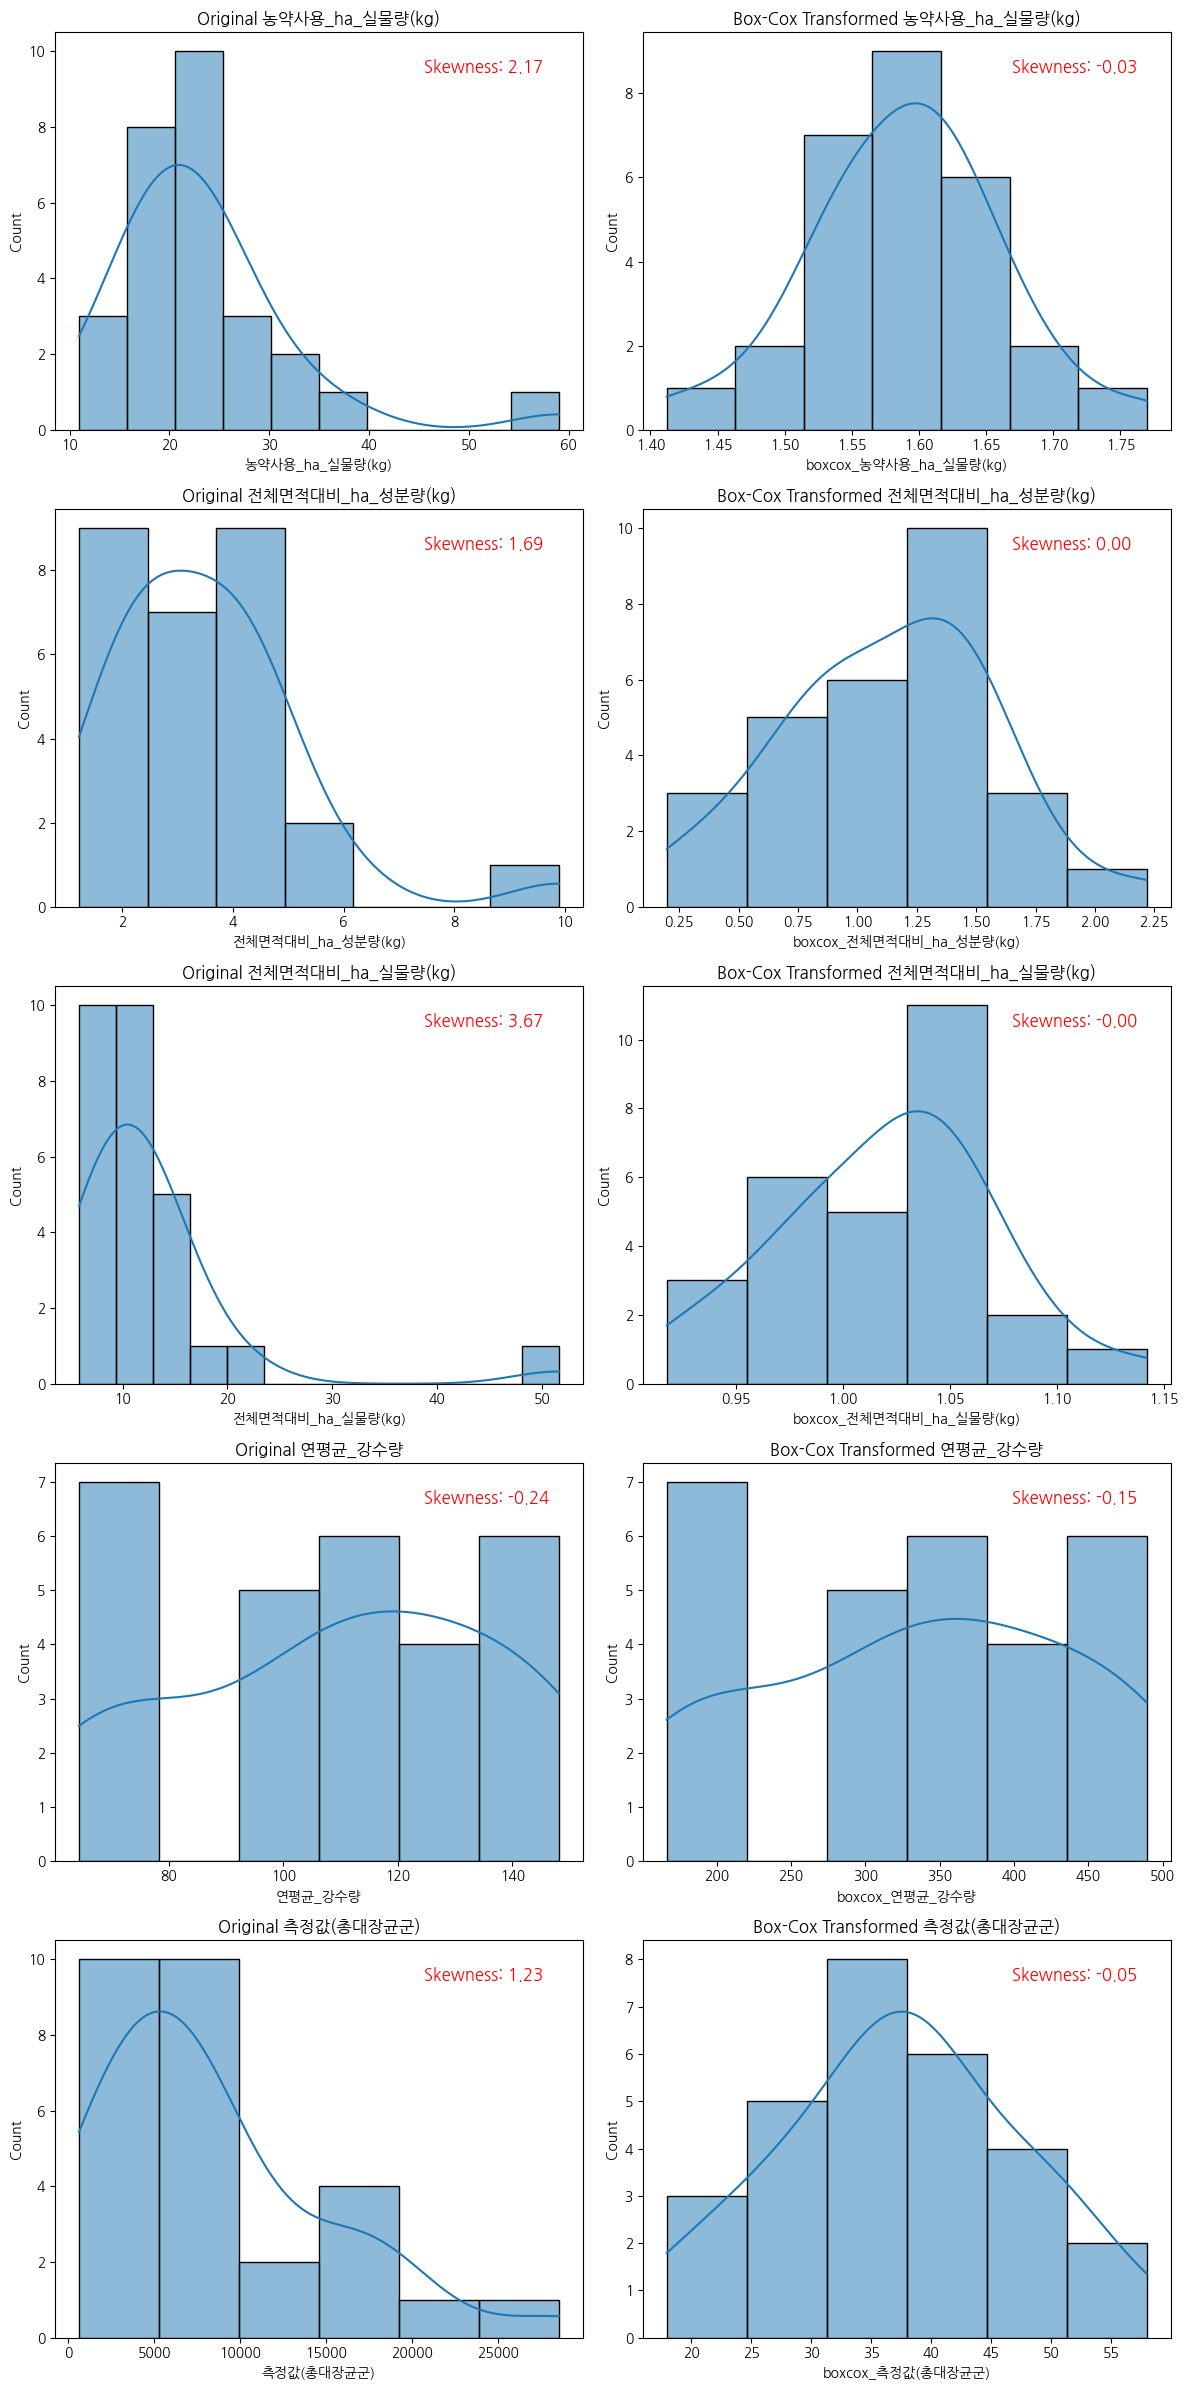

In [296]:
train = TransDistComp(train, train_non_norm)

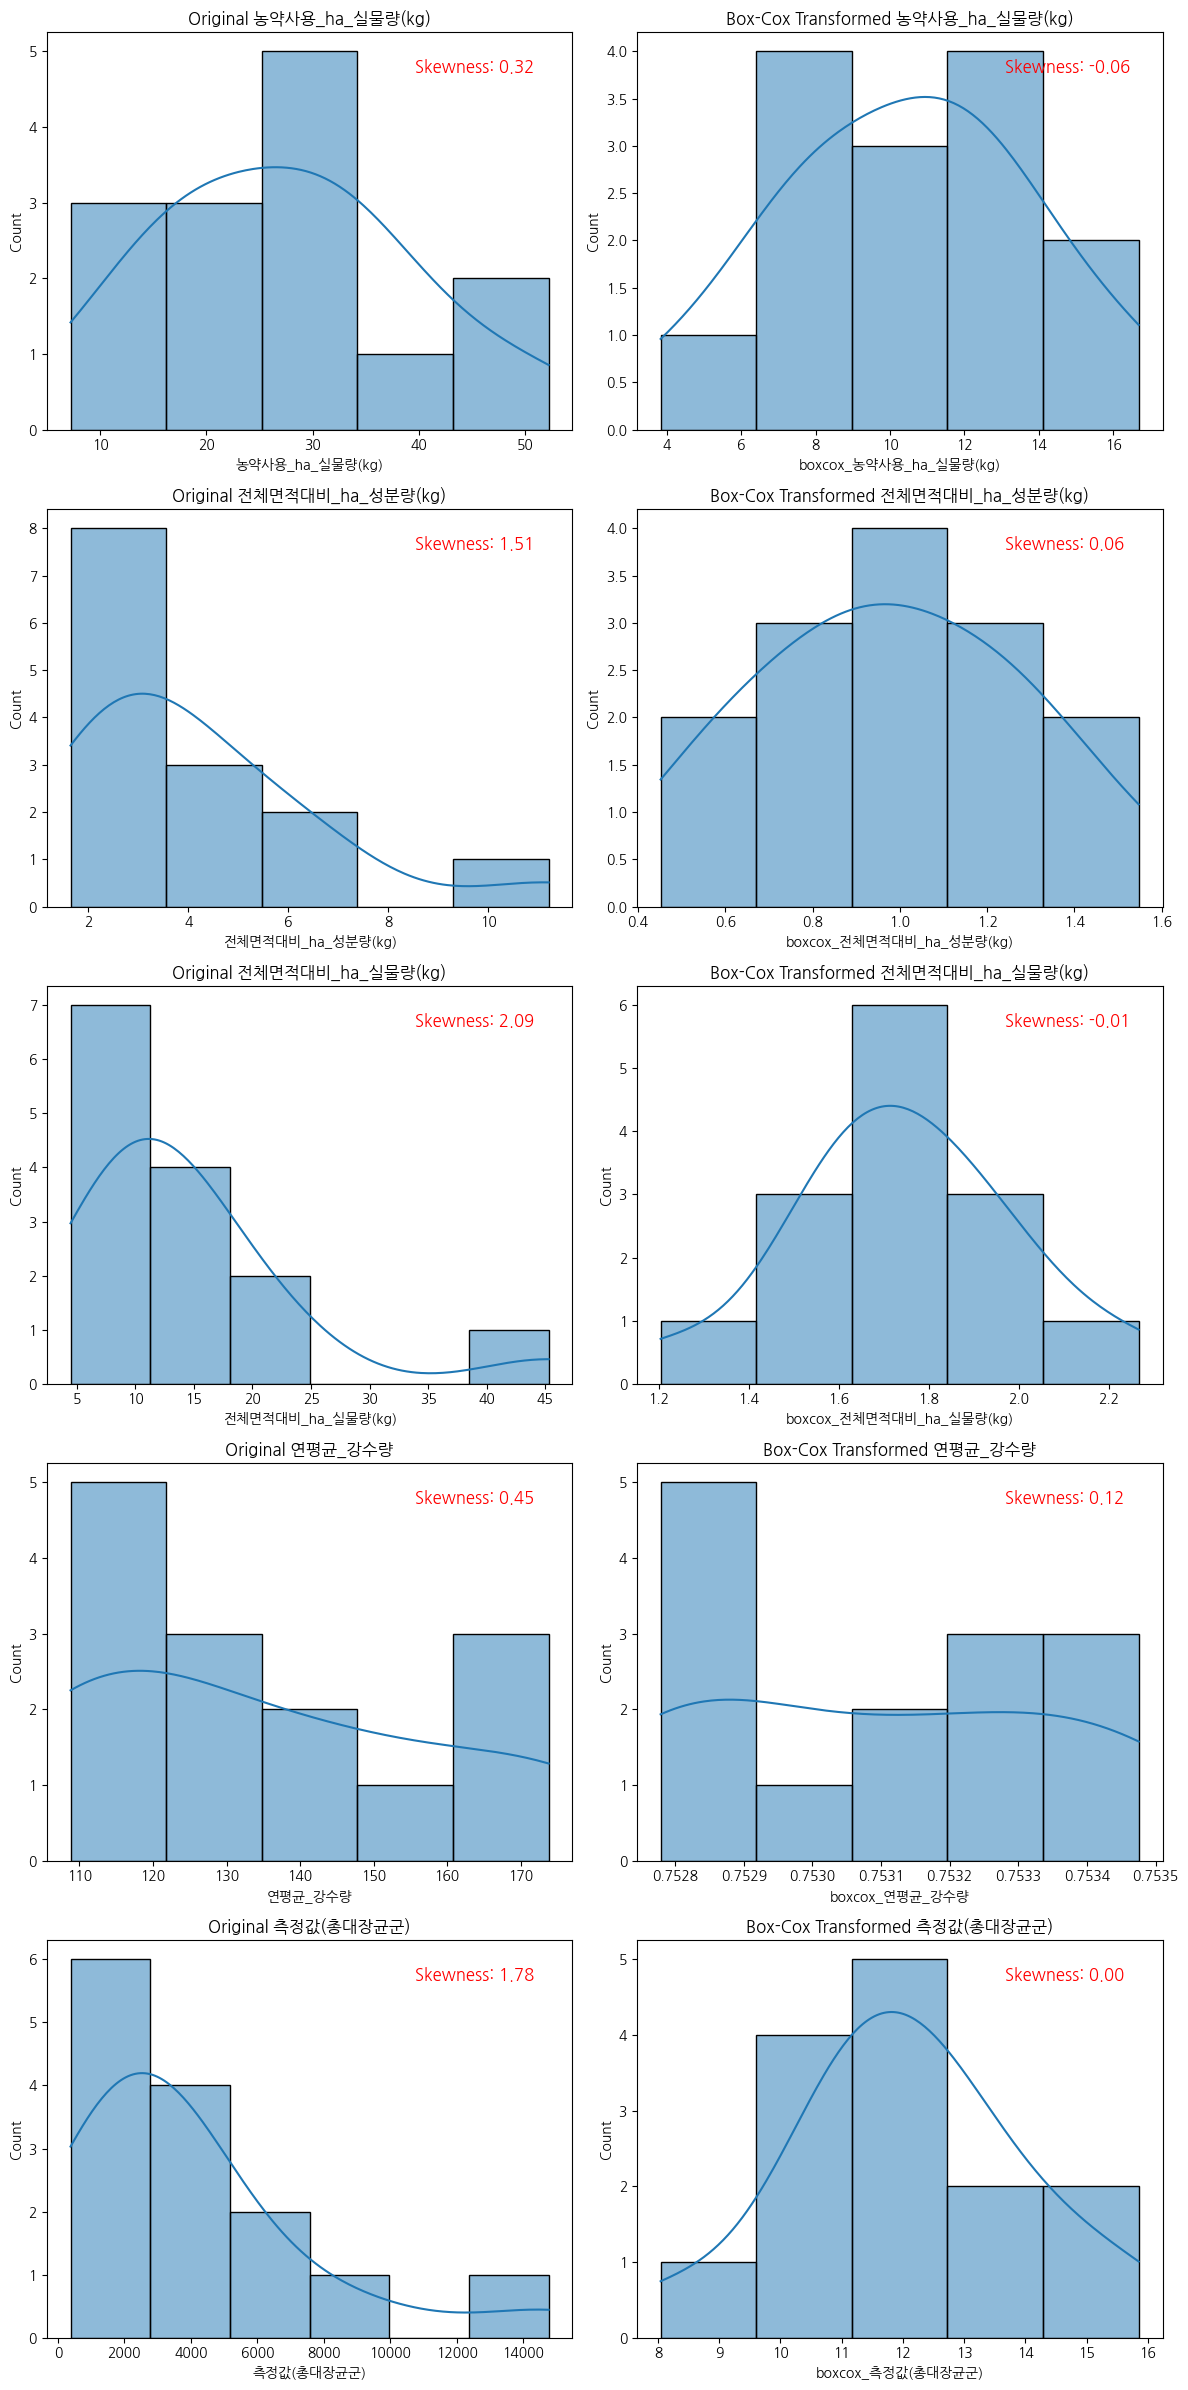

In [297]:
test = TransDistComp(test, train_non_norm) #train을 기준으로 정규화

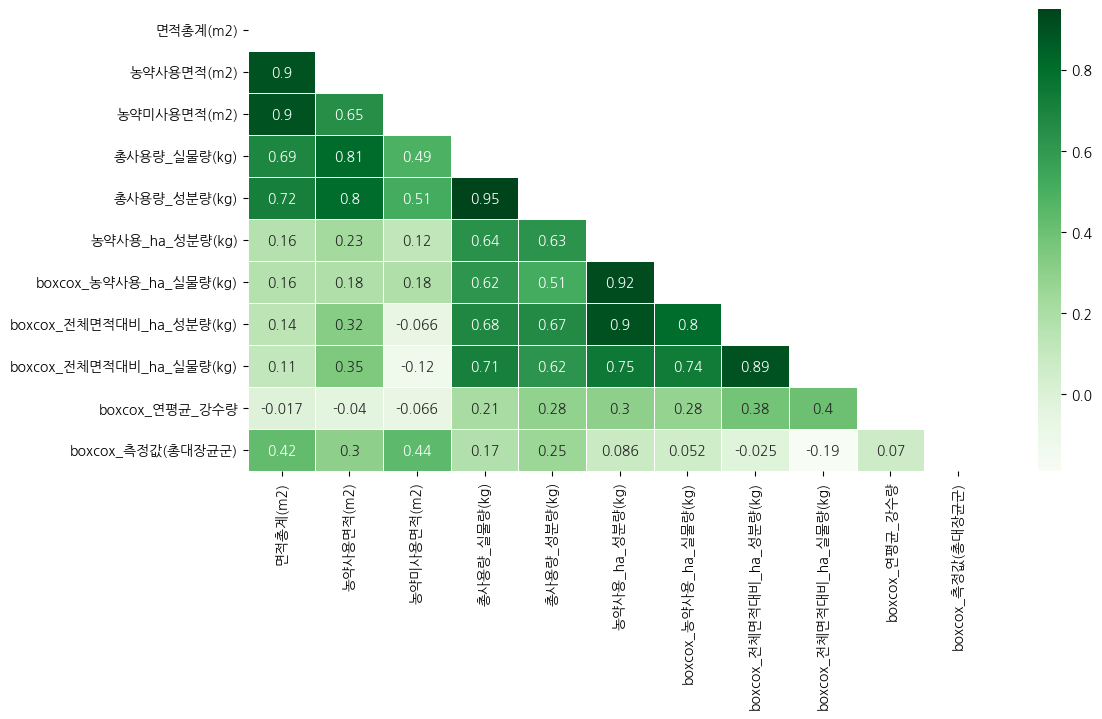

In [298]:
# 상관관계 히트맵
plt.figure(figsize=(12, 6))
mask = np.triu(np.ones_like(train.corr()))
sns.heatmap(train.corr(), annot=True, cmap='Greens', mask=mask, linewidths=0.5)
plt.show()

In [299]:
def combine_features(df, feature1, feature2):
    # 두 변수 결합하여 새로운 변수 생성
    new_feature_name = f'{feature1}_and_{feature2}'
    df[new_feature_name] = df[feature1] * df[feature2]

    # 기존 변수 제거
    df.drop([feature1, feature2], axis=1, inplace=True)

    return df

In [300]:
train.columns

Index(['면적총계(m2)', '농약사용면적(m2)', '농약미사용면적(m2)', '총사용량_실물량(kg)', '총사용량_성분량(kg)',
       '농약사용_ha_성분량(kg)', 'boxcox_농약사용_ha_실물량(kg)', 'boxcox_전체면적대비_ha_성분량(kg)',
       'boxcox_전체면적대비_ha_실물량(kg)', 'boxcox_연평균_강수량', 'boxcox_측정값(총대장균군)'],
      dtype='object')

In [301]:
train = combine_features(train, '농약사용면적(m2)', '농약미사용면적(m2)')
train = combine_features(train, '농약사용면적(m2)_and_농약미사용면적(m2)', '면적총계(m2)')
train = combine_features(train, '총사용량_실물량(kg)', '총사용량_성분량(kg)')
train = combine_features(train, '농약사용_ha_성분량(kg)', 'boxcox_농약사용_ha_실물량(kg)')
train = combine_features(train, 'boxcox_전체면적대비_ha_성분량(kg)', 'boxcox_전체면적대비_ha_실물량(kg)')

In [304]:
test = combine_features(test, '농약사용면적(m2)', '농약미사용면적(m2)')
test = combine_features(test, '농약사용면적(m2)_and_농약미사용면적(m2)', '면적총계(m2)')
test = combine_features(test, '총사용량_실물량(kg)', '총사용량_성분량(kg)')
test = combine_features(test, '농약사용_ha_성분량(kg)', 'boxcox_농약사용_ha_실물량(kg)')
test = combine_features(test, 'boxcox_전체면적대비_ha_성분량(kg)', 'boxcox_전체면적대비_ha_실물량(kg)')

In [303]:
train.corr()

,boxcox_연평균_강수량,boxcox_측정값(총대장균군),농약사용면적(m2)_and_농약미사용면적(m2)_and_면적총계(m2),총사용량_실물량(kg)_and_총사용량_성분량(kg),농약사용_ha_성분량(kg)_and_boxcox_농약사용_ha_실물량(kg),boxcox_전체면적대비_ha_성분량(kg)_and_boxcox_전체면적대비_ha_실물량(kg)
boxcox_연평균_강수량,1.000000,0.070302,-0.007942,0.208978,0.296041,0.386180
boxcox_측정값(총대장균군),0.070302,1.000000,0.198313,0.224806,0.061205,-0.043294
농약사용면적(m2)_and_농약미사용면적(m2)_and_면적총계(m2),-0.007942,0.198313,1.000000,0.783115,0.284114,0.259941
총사용량_실물량(kg)_and_총사용량_성분량(kg),0.208978,0.224806,0.783115,1.000000,0.581054,0.608763
농약사용_ha_성분량(kg)_and_boxcox_농약사용_ha_실물량(kg),0.296041,0.061205,0.284114,0.581054,1.000000,0.903578
boxcox_전체면적대비_ha_성분량(kg)_and_boxcox_전체면적대비_ha_실물량(kg),0.386180,-0.043294,0.259941,0.608763,0.903578,1.000000


# 3. 모델링

In [305]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [306]:
# test에서 예측할 값 제거
X_test = test.drop(columns=['boxcox_측정값(총대장균군)'])
y_test = test['boxcox_측정값(총대장균군)']

# 입력 변수(X)와 출력 변수(y) 분리
X_train = train.drop(columns=['boxcox_측정값(총대장균군)'])
y_train = train['boxcox_측정값(총대장균군)']

In [307]:
from sklearn.tree import DecisionTreeRegressor

# 평가 데이터 분리
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 모델 학습
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_part, y_train_part)

# 예측 및 평가
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Validation MSE: {mse}')
print(f'Validation R²: {r2}')

Validation MSE: 117.43295929132005
Validation R²: -2.4664387490207353


In [308]:
# 테스트 데이터 예측 및 평가
test_predictions = model.predict(X_test)

test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f'Test MSE: {test_mse}')
print(f'Test R²: {test_r2}')

Test MSE: 933.7379945481088
Test R²: -261.27643503670635
